In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
vsale = pd.read_csv("C:\\Users\\dell\\Documents\\vgsales.csv")

In [3]:
vsale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
vsale.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [5]:
vsale.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
vsale[vsale.isna().any(axis = 1)]['Global_Sales'].sort_values(ascending = False).head()

179    5.23
377    3.49
431    3.17
470    3.00
607    2.53
Name: Global_Sales, dtype: float64

In [7]:
vsale.dropna(inplace = True)

vsale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Wii Sports'),
  Text(1, 0, 'Super Mario Bros.'),
  Text(2, 0, 'Mario Kart Wii'),
  Text(3, 0, 'Wii Sports Resort'),
  Text(4, 0, 'Pokemon Red/Pokemon Blue'),
  Text(5, 0, 'Tetris'),
  Text(6, 0, 'New Super Mario Bros.'),
  Text(7, 0, 'Wii Play'),
  Text(8, 0, 'New Super Mario Bros. Wii'),
  Text(9, 0, 'Duck Hunt')])

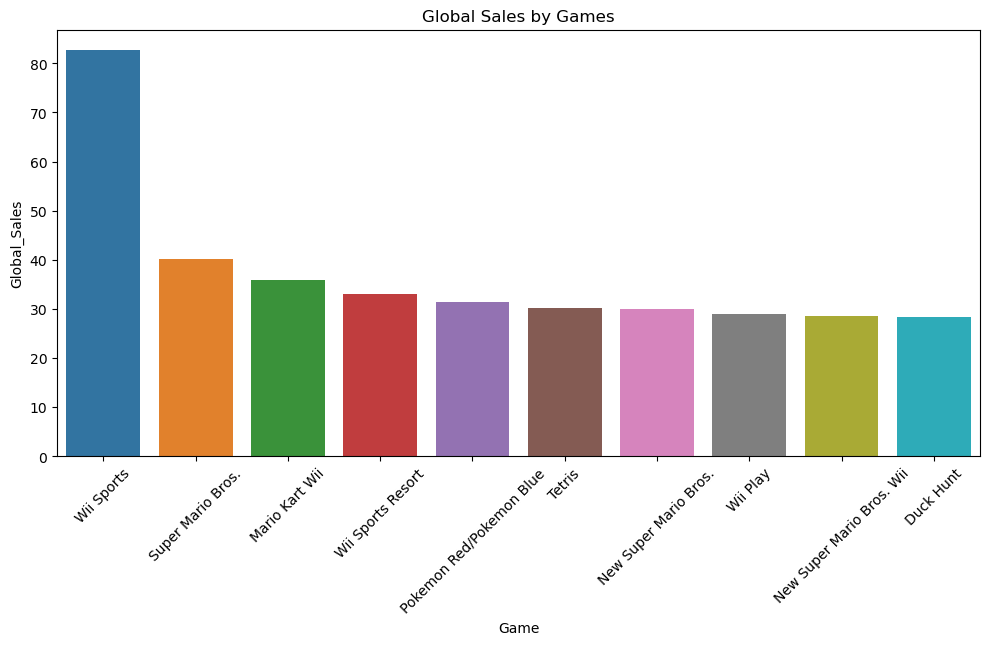

In [8]:
vsale_n = vsale.sort_values('Global_Sales', ascending = False).head(10)

plt.figure(figsize = (10,5))
sns.barplot(data = vsale_n, x = 'Name', y = 'Global_Sales')

plt.tight_layout()
plt.title('Global Sales by Games')
plt.xlabel('Game')
plt.xticks(rotation = 45)

In [9]:
vsale_p = vsale.groupby('Platform').sum().reset_index()

vsale_p.loc[vsale_p.Global_Sales < 100, 'Platform'] = 'Other'
    
fig = px.pie(vsale_p,
       values = 'Global_Sales',
       names = 'Platform',
       hole = 0.3,
       opacity = 0.8)

fig.add_annotation(text = 'Platform', x = 0.5, y = 0.5, font_size = 15,
                   showarrow = False, font_family = 'monospace')
fig.update_layout(
    font_family = 'monospace',
    hoverlabel = dict(bgcolor = 'white'))
                

In [10]:
vsale_g = vsale.groupby('Genre').sum().reset_index()

fig = px.histogram(vsale_g, y = 'Global_Sales',
                   x = 'Genre').update_xaxes(categoryorder= 'total descending')
fig.show()

In [11]:
vsale_gy = vsale.groupby(['Genre', 'Year']).sum().reset_index()

px.histogram(vsale_gy,
             x = 'Genre',
             y = 'Global_Sales',
             animation_frame='Year').update_xaxes(categoryorder='total descending')

In [11]:
vsale_y = vsale.groupby('Year').sum().reset_index()

fig = px.bar(vsale_y, x = 'Year', y = 'Global_Sales', text = 'Global_Sales', 
       title = 'Video Games Sales since 1980')
fig.update_traces(textposition = 'outside')

In [13]:
vsale.groupby(['Platform', 'Genre']).sum().sort_values('NA_Sales', ascending = False).head(10).reset_index()

Platform    Genre     Rank  \
0     X360  Shooter  1166322   
1      Wii   Sports  1879162   
2     X360   Action  1982194   
3      PS2   Sports  2444883   
4      PS2   Action  2192117   
5      PS3   Action  2385385   
6      Wii     Misc  1896015   
7     X360   Sports  1428203   
8      PS3  Shooter   747544   
9      PS2   Racing  1437117   

                                                Name      Year  \
0  Call of Duty: Modern Warfare 3Call of Duty: Bl...  395942.0   
1  Wii SportsWii Sports ResortWii FitWii Fit Plus...  514307.0   
2  Grand Theft Auto VGrand Theft Auto IVRed Dead ...  639254.0   
3  Madden NFL 06Madden NFL 2005Madden NFL 07Tony ...  783675.0   
4  Grand Theft Auto: San AndreasGrand Theft Auto:...  691671.0   
5  Grand Theft Auto VGrand Theft Auto IVFIFA Socc...  750197.0   
6  Wii PlayJust Dance 3Just Dance 2Wii PartyMario...  546549.0   
7  Kinect SportsFIFA 14FIFA 12FIFA Soccer 11FIFA ...  432076.0   
8  Call of Duty: Black Ops IICall of Duty: Modern...  311612.0   
9  Gran Turismo 3: A-SpecGran Turismo 4Need for S...  424761.0   

                                           Publisher  NA_Sales  EU_Sales  \
0  ActivisionActivisionActivisionActivisionMicros...    173.37     76.29   
1  NintendoNintendoNintendoNintendoSega505 GamesS...    149.94     94.87   
2  Take-Two InteractiveTake-Two InteractiveTake-T...    139.62     75.85   
3  Electronic ArtsElectronic ArtsElectronic ArtsA...    128.25     66.55   
4  Take-Two InteractiveTake-Two InteractiveTake-T...    127.71     71.34   
5  Take-Two InteractiveTake-Two InteractiveElectr...    119.82    109.26   
6  NintendoUbisoftUbisoftNintendoNintendoUbisoftU...    119.46     65.00   
7  Microsoft Game StudiosElectronic ArtsElectroni...     88.44     37.16   
8  ActivisionActivisionActivisionActivisionActivi...     81.71     75.10   
9  Sony Computer EntertainmentSony Computer Enter...     74.73     46.61   

   JP_Sales  Other_Sales  Global_Sales  
0      3.05        24.43        277.23  
1     18.25        26.90        289.95  
2      2.77        21.36        239.67  
3     24.69        43.18        262.64  
4     25.72        47.61        272.43  
5     28.95        46.00        304.02  
6     13.71        19.13        217.43  
7      0.40        11.33        137.43  
8      8.80        30.18        195.80  
9      5.88        27.11        154.21

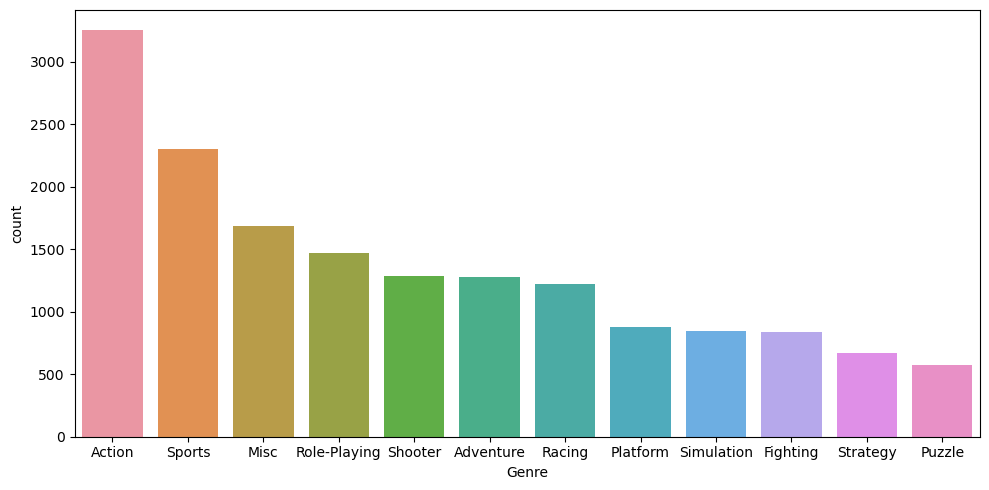

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(data = vsale, x = 'Genre',
              order = vsale['Genre'].value_counts().index)
plt.tight_layout()

Text(0.5, 1.0, 'Sales by Genre')

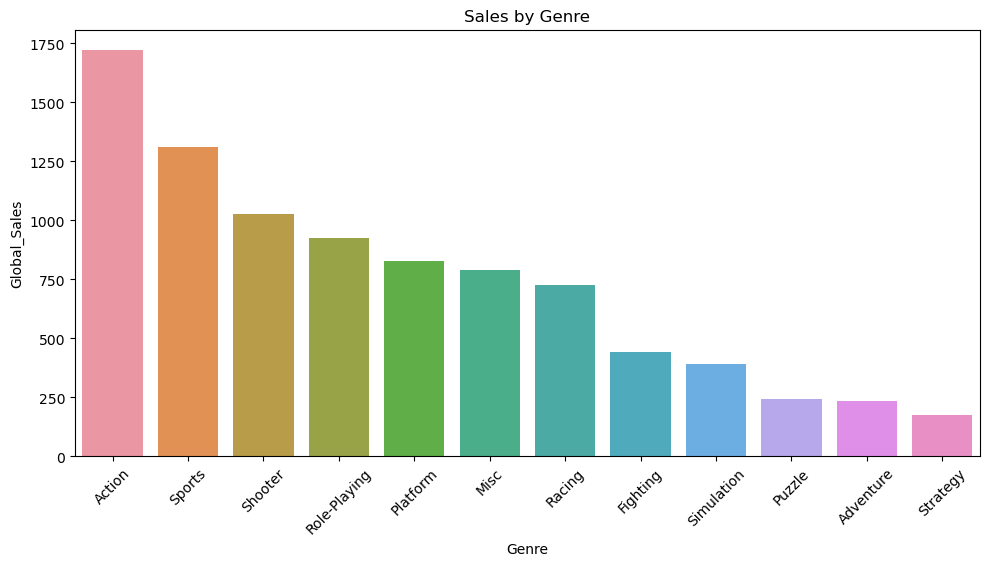

In [15]:
vsale_p =  vsale.groupby('Genre').sum()

vsale_p.reset_index(inplace = True)

plt.figure(figsize = (10,5))
sns.barplot(data = vsale_p, x = 'Genre', y = 'Global_Sales',
           order = vsale_p.sort_values('Global_Sales', ascending = False).Genre)
plt.tight_layout()
plt.xticks(rotation=45)

plt.title('Sales by Genre')

### Clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
X = vsale.loc[:,'NA_Sales':].values

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [15]:
vsale['Clusters'] = kmeans.labels_

In [16]:
vsale['Clusters'] = vsale['Clusters'].astype(str)

In [17]:
px.scatter(vsale,
           x = 'NA_Sales',
           y = 'Global_Sales',
          color = 'Clusters',
          hover_data = ['Name','Genre','Publisher', 'Platform', 'Year'])

In [18]:
vsale.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales Clusters  
0     41.49     29.02      3.77         8.46         82.74        2  
1     29.08      3.58      6.81         0.77         40.24        2  
2     15.85     12.88      3.79         3.31         35.82        2  
3     15.75     11.01      3.28         2.96         33.00        2  
4     11.27      8.89     10.22         1.00         31.37        2

In [19]:
vsale1 = vsale.copy()

In [20]:
vsale['Clusters'] = vsale1.loc[vsale1.Clusters == 1, 'Clusters']='class'

In [21]:
vsale1.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales Clusters  
0     41.49     29.02      3.77         8.46         82.74        2  
1     29.08      3.58      6.81         0.77         40.24        2  
2     15.85     12.88      3.79         3.31         35.82        2  
3     15.75     11.01      3.28         2.96         33.00        2  
4     11.27      8.89     10.22         1.00         31.37        2

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso

In [23]:
vgRidge = vsale[['Genre','Platform','Publisher','Year','Global_Sales']]

In [24]:
vgRidge.nunique()

Genre            12
Platform         31
Publisher       576
Year             39
Global_Sales    621
dtype: int64

In [25]:
vgRidge.shape

(16291, 5)

C:\Users\dell\AppData\Local\Temp\ipykernel_15792\1263049980.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




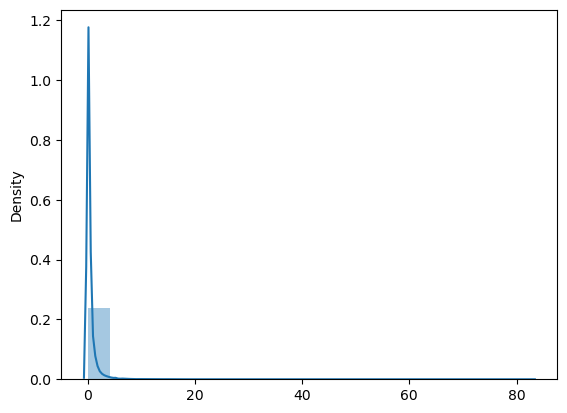

In [26]:
sns.distplot(vgRidge[['Global_Sales']],bins = 20,kde = True)
plt.show()
#distribution plot global sales

C:\Users\dell\AppData\Local\Temp\ipykernel_15792\2207473582.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




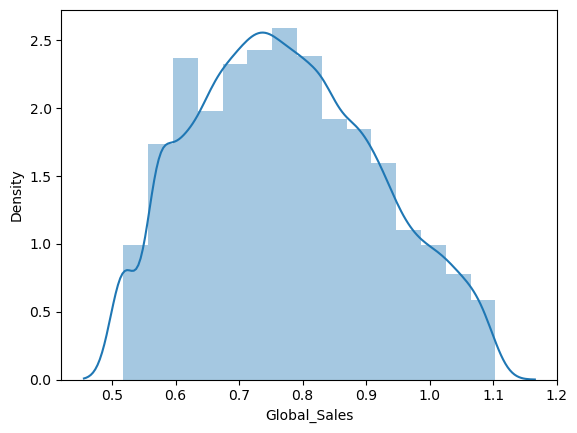

In [27]:
restrictionSales = (vgRidge['Global_Sales'] < 2)
sns.distplot((vgRidge['Global_Sales'][restrictionSales])**(1/7),bins = 15,kde = True)
plt.show()

In [28]:
vgRidge = vgRidge[restrictionSales]
vgRidge['Global_Sales'] = vgRidge['Global_Sales']**(1/7)
vgRidge.shape

(15450, 5)

In [29]:
vgRidge = pd.concat([pd.get_dummies(vgRidge[['Genre','Platform','Publisher']]),vgRidge[['Year','Global_Sales']]],axis = 1)

In [30]:
data = vgRidge.values 
X,y = data[:,:-1], data[:,-1]
print('Input shape: ', X.shape)
print('Output shape: ', y.shape)

Input shape:  (15450, 616)
Output shape:  (15450,)


In [31]:
model = Ridge(alpha = 1.0)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [33]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
#accuracy of the Ridge regression 

In [35]:
print('MSE: ',mean_squared_error(y_test, y_pred))
print('r2 score: ',r2_score(y_test, y_pred))

MSE:  0.013692314018892262
r2 score:  0.33860626169506036


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.logspace(-1,1,num = 50)
search = GridSearchCV(model, grid, scoring= 'r2', cv=cv, n_jobs=-1)
results = search.fit(X, y)
print('r2: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
model = Ridge(alpha = results.best_params_['alpha'])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
print('MSE: ',mean_squared_error(y_test, y_pred))
print('r2 score: ',r2_score(y_test, y_pred))